<a href="https://colab.research.google.com/github/Faxriddin80/Faxriddin80/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


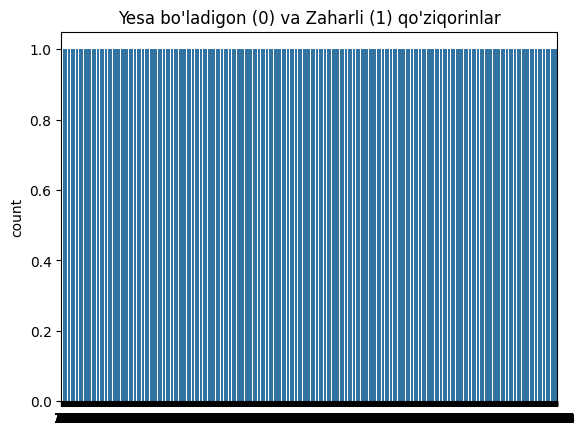

,count
class,
0,4208
1,3916


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['class'])
plt.title("Yesa bo'ladigon (0) va Zaharli (1) qo'ziqorinlar")
plt.show()
df['class'].value_counts()

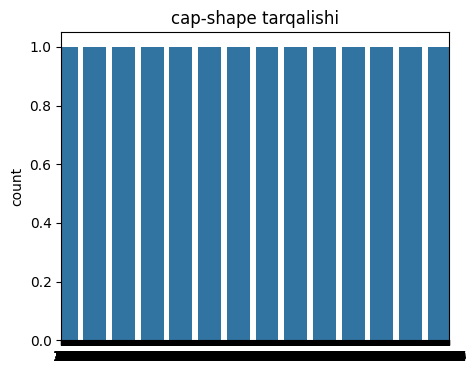

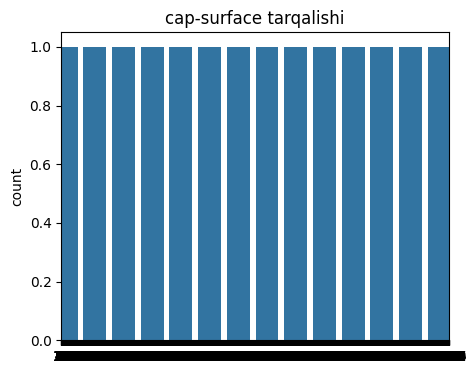

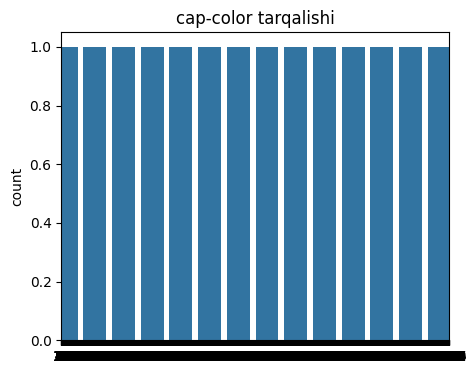

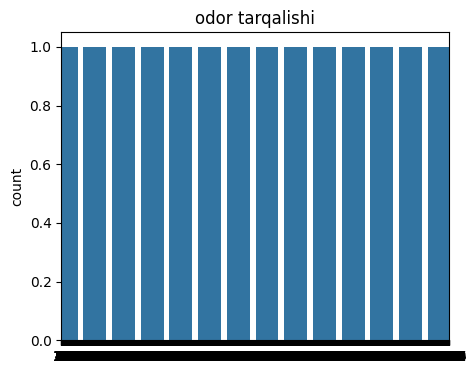

In [ ]:
columns_to_plot = ['cap-shape', 'cap-surface', 'cap-color', 'odor']
for col in columns_to_plot:
    plt.figure(figsize=(5,4))
    sns.countplot(df[col])
    plt.title(f"{col} tarqalishi")
    plt.show()

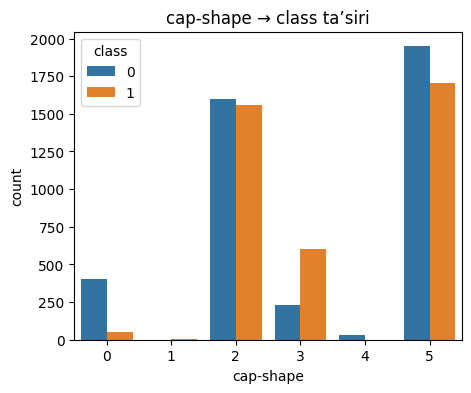

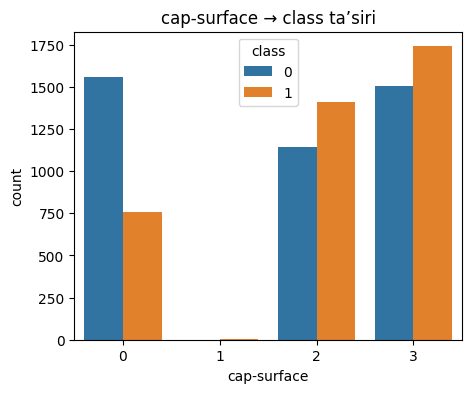

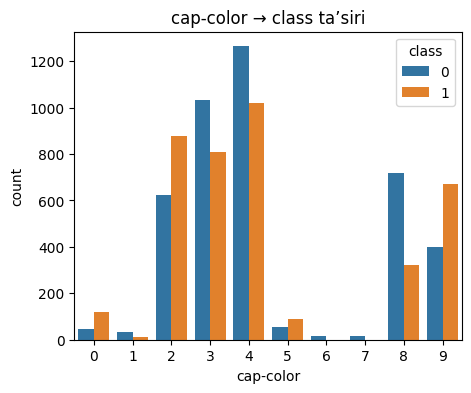

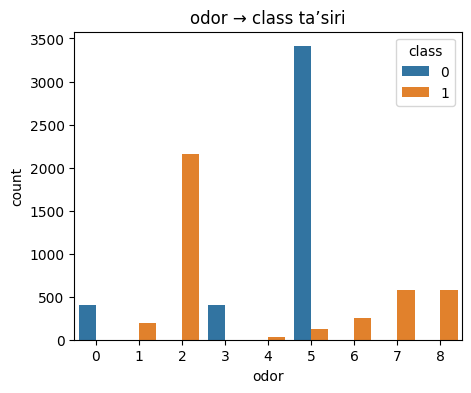

In [ ]:
for col in columns_to_plot:
    plt.figure(figsize=(5,4))
    sns.countplot(x=df[col], hue=df['class'])
    plt.title(f"{col} → class ta’siri")
    plt.show()

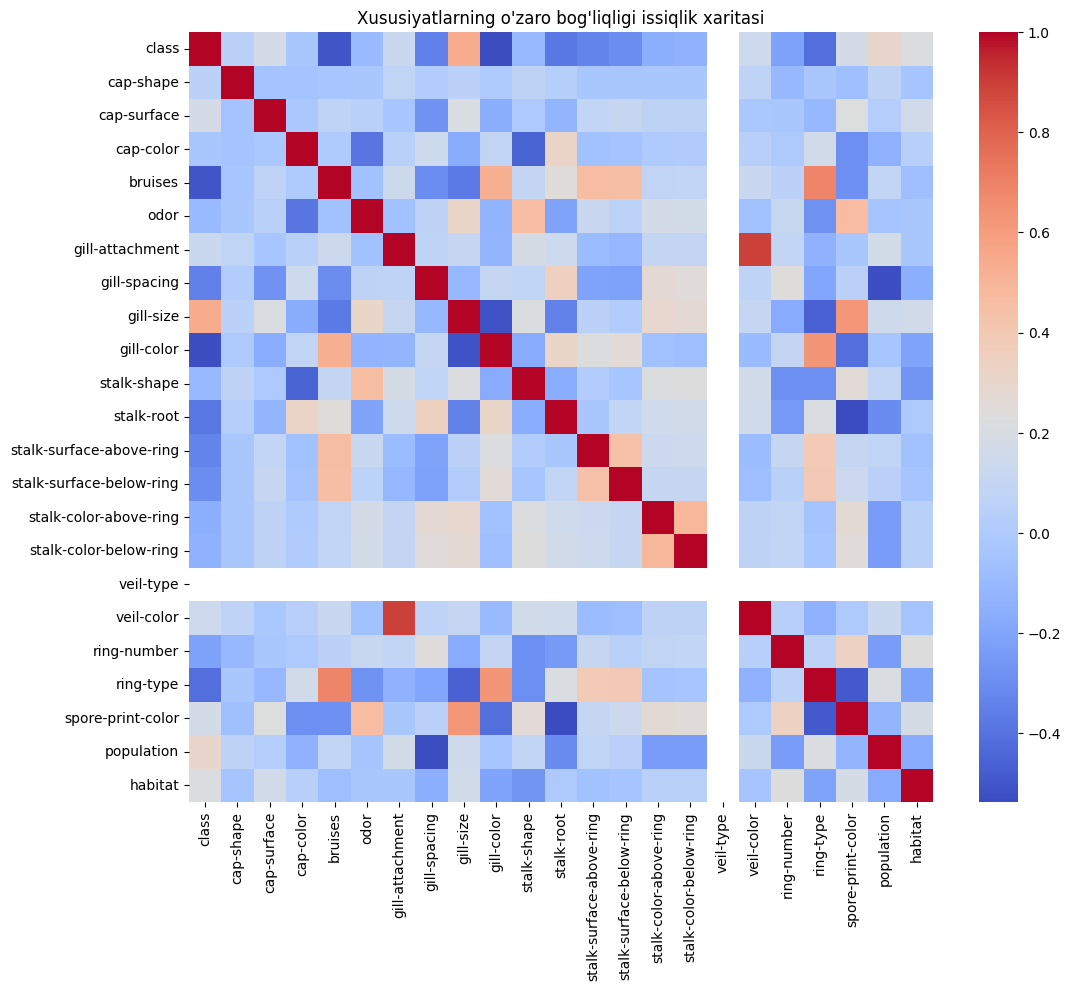

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Xususiyatlarning o'zaro bog'liqligi issiqlik xaritasi")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (6499, 22)
Test shape: (1625, 22)


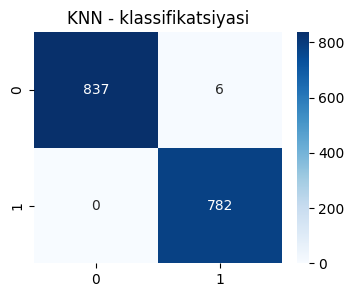

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, preds_knn)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN - klassifikatsiyasi")
plt.show()
print(classification_report(y_test, preds_knn))


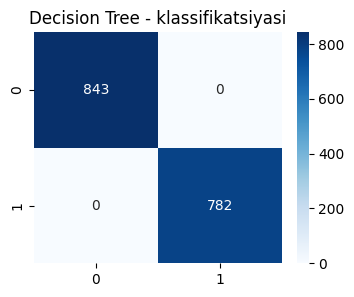

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preds_dt = dt.predict(X_test)
cm = confusion_matrix(y_test, preds_dt)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - klassifikatsiyasi")
plt.show()
print(classification_report(y_test, preds_dt))

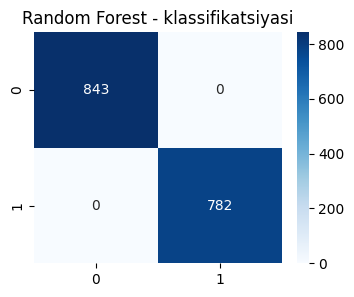

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, preds_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - klassifikatsiyasi")
plt.show()
print(classification_report(y_test, preds_rf))